In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

## 1. Lectura y Wrangling Inicial

In [3]:
# lectura con parseo de fechas
df = pd.read_csv('/content/drive/MyDrive/Superstore.csv', encoding='windows-1252', parse_dates=['Order Date','Ship Date'])

In [4]:
# eliminamos columnas que no serán de utilidad
df.drop(['Row ID', 'Postal Code'], axis=1, inplace=True)

In [5]:
# estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

In [7]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# algunos registros de ejemplo
df.sample(4).T

,701,5203,8126,9915
Order ID,CA-2017-114552,CA-2015-142454,CA-2015-137064,CA-2017-160927
Order Date,2017-09-02 00:00:00,2015-08-15 00:00:00,2015-02-06 00:00:00,2017-01-29 00:00:00
Ship Date,2017-09-08 00:00:00,2015-08-19 00:00:00,2015-02-13 00:00:00,2017-01-31 00:00:00
Ship Mode,Standard Class,Standard Class,Standard Class,Second Class
Customer ID,Dl-13600,RE-19450,TS-21655,TM-21010
Customer Name,Dorris liebe,Richard Eichhorn,Trudy Schmidt,Tamara Manning
Segment,Corporate,Consumer,Consumer,Consumer
Country,United States,United States,United States,United States
City,Cleveland,Oakland,Houston,Marion
State,Ohio,California,Texas,Iowa


## 2. Anáisis Visual

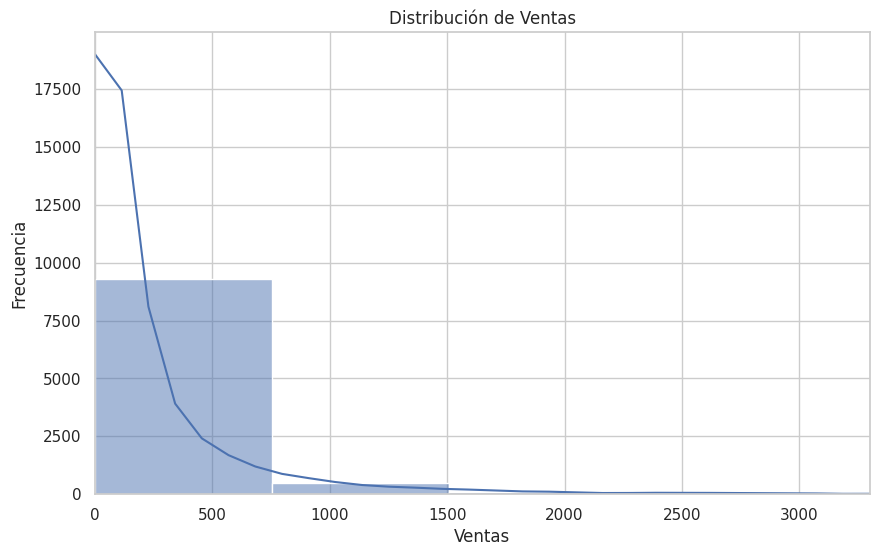

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración del estilo de los gráficos
sns.set(style="whitegrid")

# Gráfico de distribución de las ventas con límite en el eje X
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], kde=True, bins=30)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.xlim(0, 3300)  # Limitar el eje X
plt.show()



In [12]:
import numpy as np



<ipython-input-13-a4ce94225438>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=np.mean, ci=None)


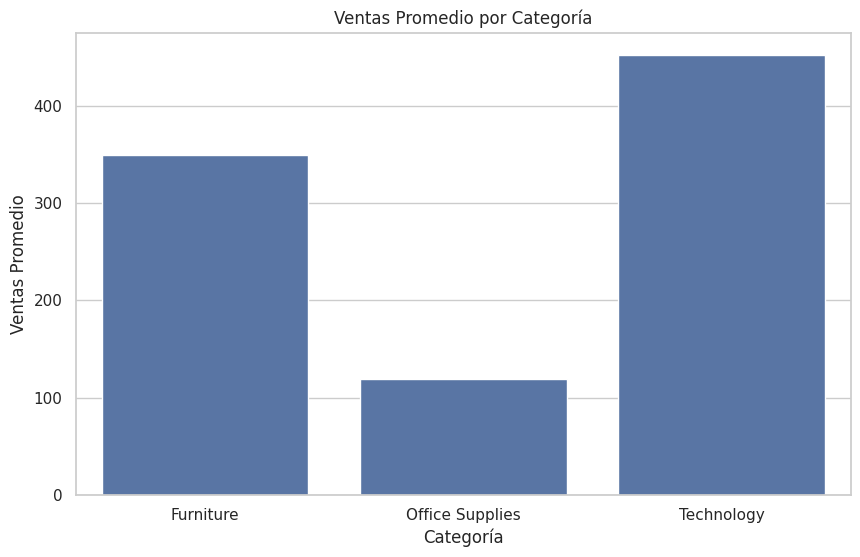

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=np.mean, ci=None)
plt.title('Ventas Promedio por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Ventas Promedio')
plt.show()



**Tecnología**

 Es la categoría con las ventas promedio más altas, lo que indica que los productos tecnológicos son los más valiosos en términos de ingresos.

Mobiliario:

También tiene un buen desempeño, pero no tanto como Tecnología.

**Suministros de Oficina:**

Tiene las ventas promedio más bajas entre las tres categorías.

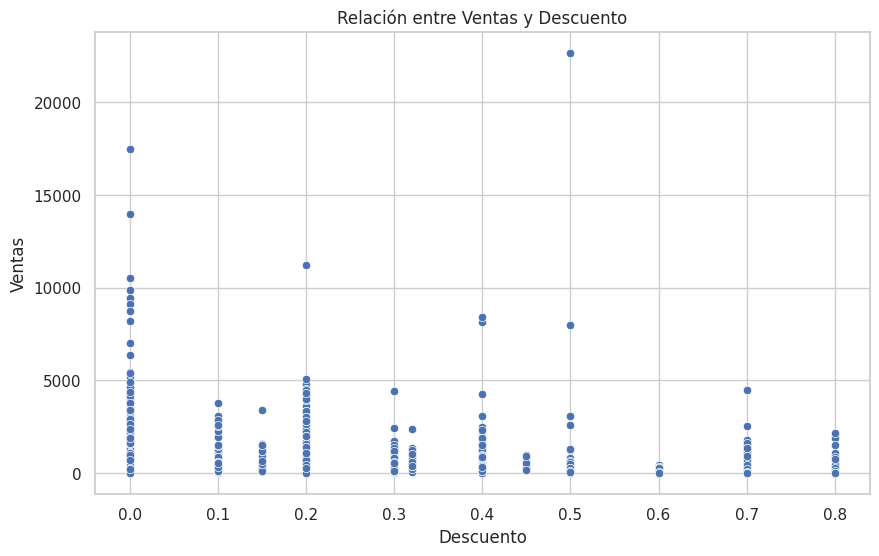

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Sales', data=df)
plt.title('Relación entre Ventas y Descuento')
plt.xlabel('Descuento')
plt.ylabel('Ventas')
plt.show()


Insight:

Hay una gran concentración de ventas con descuentos bajos (alrededor del 0.0 al 0.1), lo que indica que la mayoría de las ventas se realizan con descuentos mínimos.

No hay una relación clara entre el descuento y el monto de las ventas, ya que hay ventas altas y bajas en casi todos los niveles de descuento.


Se observan algunos valores atípicos donde grandes descuentos (por ejemplo, 0.8) no siempre resultan en ventas altas.

<ipython-input-15-fea328ff5941>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Sales', data=df, estimator=np.sum, ci=None)


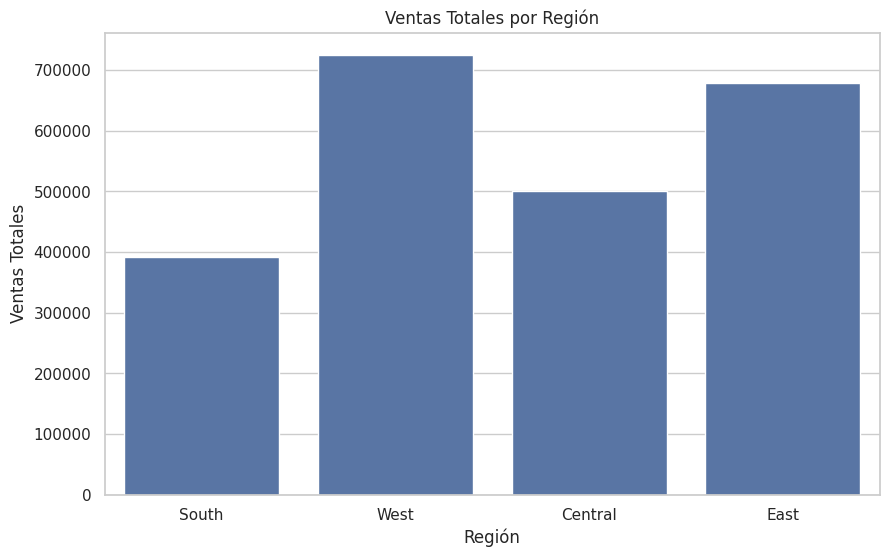

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=np.sum, ci=None)
plt.title('Ventas Totales por Región')
plt.xlabel('Región')
plt.ylabel('Ventas Totales')
plt.show()



**Oeste (West):**

Es la región con las ventas totales más altas, seguida de cerca por el **Este (East).**

**Centro (Central) y Sur (South):**

Tienen ventas totales menores comparadas con las regiones Oeste y Este, lo que puede indicar oportunidades para aumentar las ventas en estas áreas.
Próximos Pasos



In [17]:
# Filtrar las columnas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print("Columnas numéricas:")
print(numerical_columns)


Columnas numéricas:
Index(['Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


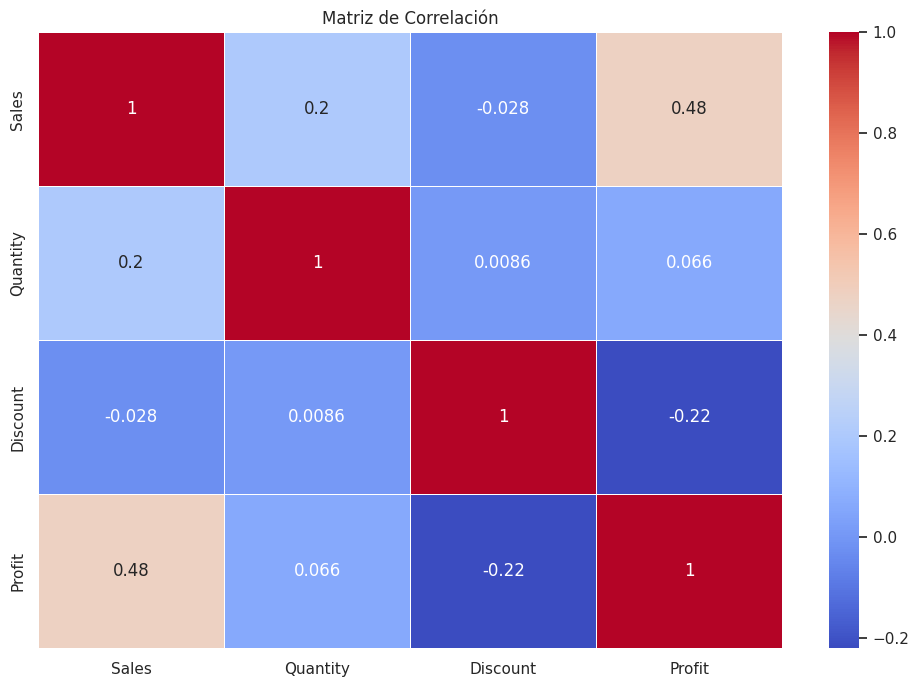

In [18]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


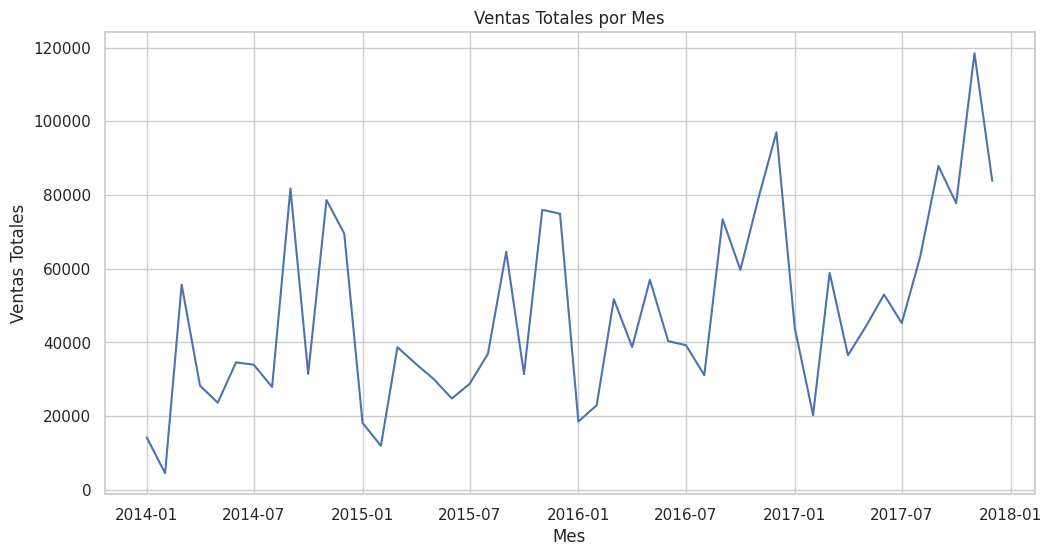

In [21]:
df['Order Month'] = df['Order Date'].dt.to_period('M')

monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()
monthly_sales['Order Month'] = monthly_sales['Order Month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Month', y='Sales', data=monthly_sales)
plt.title('Ventas Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.show()


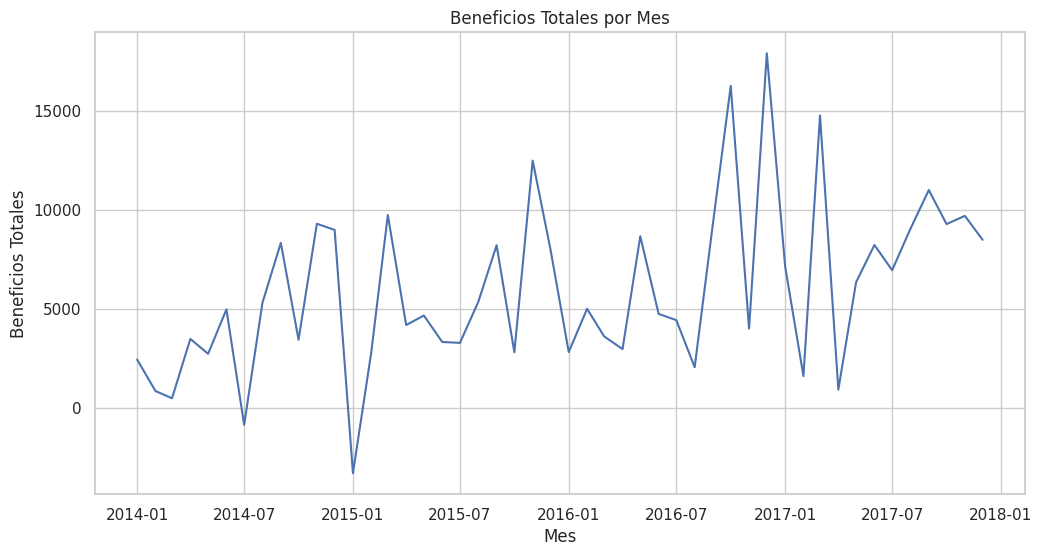

In [22]:
monthly_profit = df.groupby('Order Month')['Profit'].sum().reset_index()
monthly_profit['Order Month'] = monthly_profit['Order Month'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Month', y='Profit', data=monthly_profit)
plt.title('Beneficios Totales por Mes')
plt.xlabel('Mes')
plt.ylabel('Beneficios Totales')
plt.show()


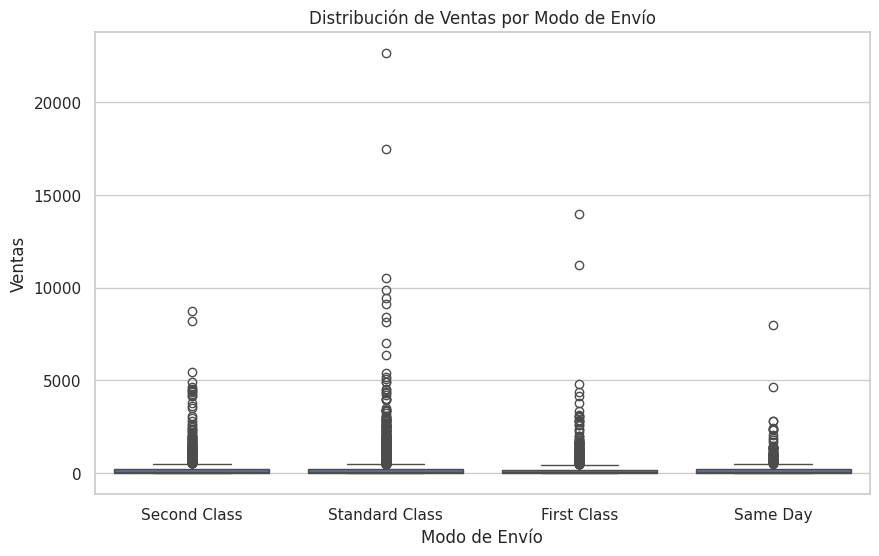

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Sales', data=df)
plt.title('Distribución de Ventas por Modo de Envío')
plt.xlabel('Modo de Envío')
plt.ylabel('Ventas')
plt.show()


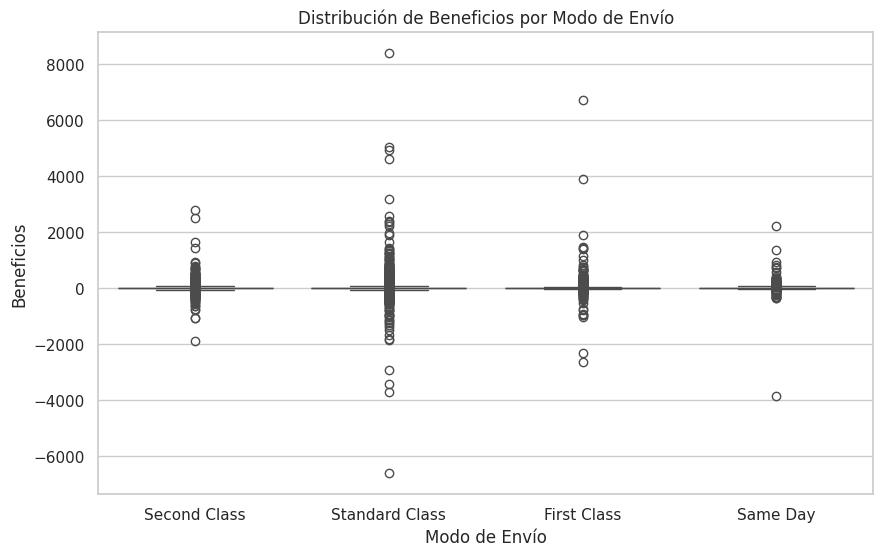

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ship Mode', y='Profit', data=df)
plt.title('Distribución de Beneficios por Modo de Envío')
plt.xlabel('Modo de Envío')
plt.ylabel('Beneficios')
plt.show()


In [26]:
# Filtrar transacciones con beneficios negativos
negative_profit_df = df[df['Profit'] < 0]

# Mostrar algunas filas de ejemplo
negative_profit_df.head()


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Month
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10
14,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,Central,OFF-AP-10002311,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.8580,2015-11
15,US-2015-118983,2015-11-22,2015-11-26,Standard Class,HP-14815,Harold Pawlan,Home Office,United States,Fort Worth,Texas,Central,OFF-BI-10000756,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,2.5440,3,0.80,-3.8160,2015-11
23,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,2,0.30,-1.0196,2017-07
27,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7,0.50,-1665.0522,2015-09


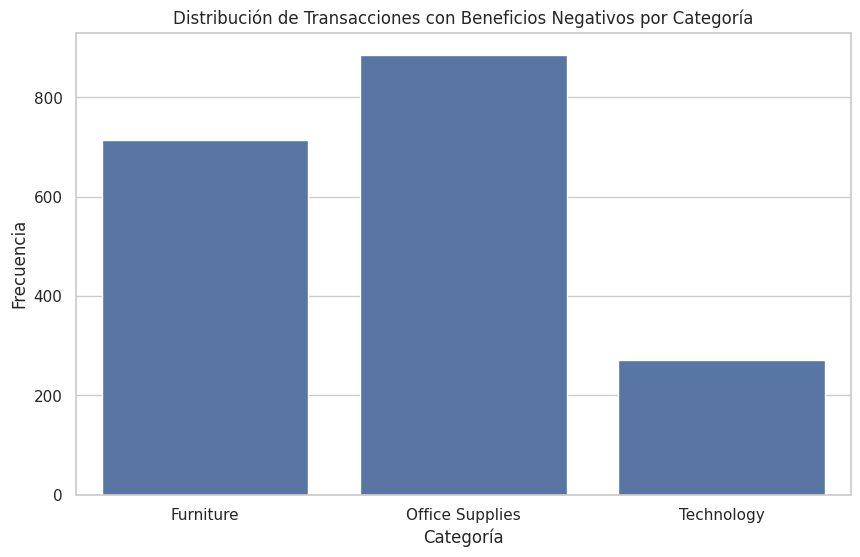

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=negative_profit_df)
plt.title('Distribución de Transacciones con Beneficios Negativos por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()


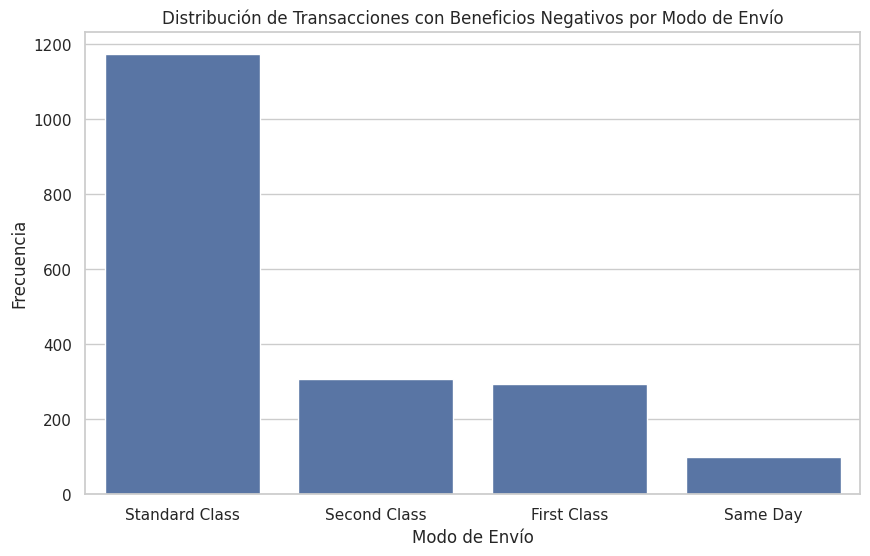

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ship Mode', data=negative_profit_df)
plt.title('Distribución de Transacciones con Beneficios Negativos por Modo de Envío')
plt.xlabel('Modo de Envío')
plt.ylabel('Frecuencia')
plt.show()


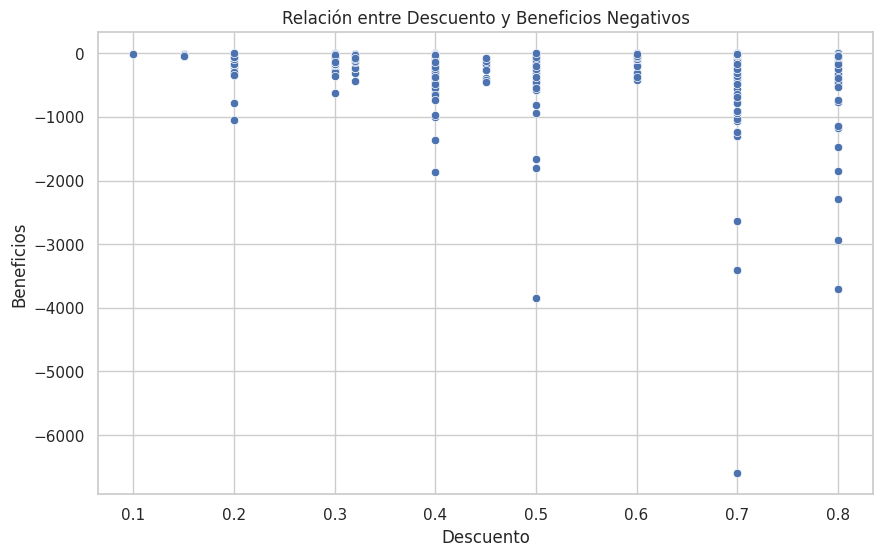

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=negative_profit_df)
plt.title('Relación entre Descuento y Beneficios Negativos')
plt.xlabel('Descuento')
plt.ylabel('Beneficios')
plt.show()


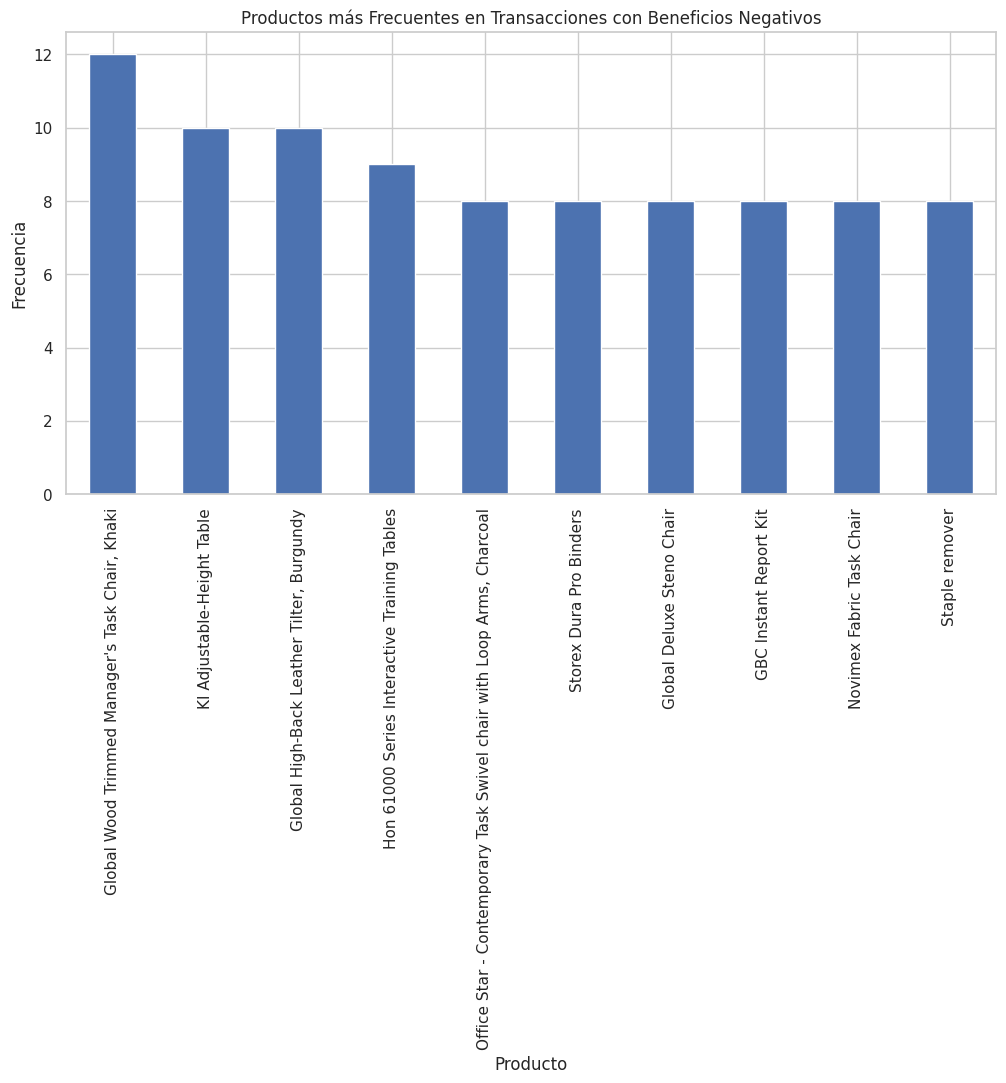

In [30]:
negative_profit_df['Product Name'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Productos más Frecuentes en Transacciones con Beneficios Negativos')
plt.xlabel('Producto')
plt.ylabel('Frecuencia')
plt.show()


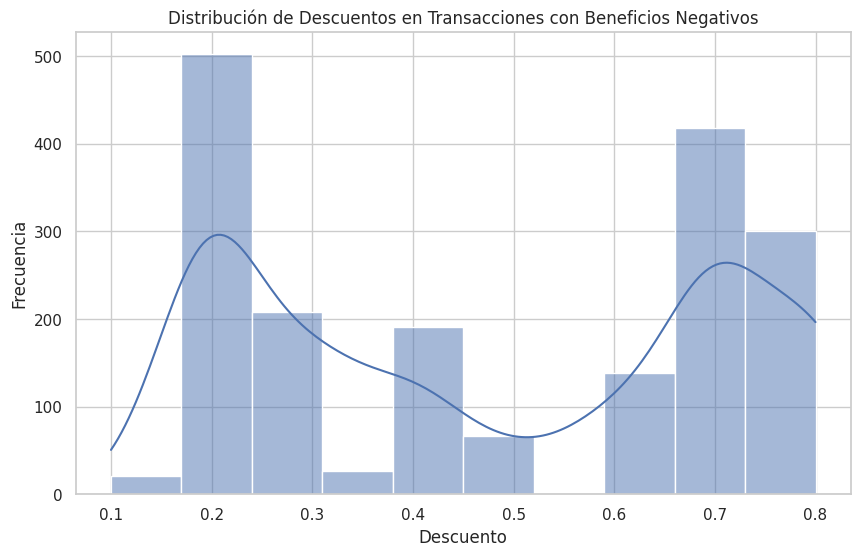

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(negative_profit_df['Discount'], bins=10, kde=True)
plt.title('Distribución de Descuentos en Transacciones con Beneficios Negativos')
plt.xlabel('Descuento')
plt.ylabel('Frecuencia')
plt.show()


**Resumen de beneficios negativos**

**Categorías:**

**Office Supplies** y **Furniture** son las categorías con más problemas de beneficios negativos, sugiriendo la necesidad de revisar la estrategia de precios y costos en estas áreas.

Modo de Envío:

**Standard Class** muestra la mayor cantidad de transacciones con beneficios negativos, indicando que los costos asociados con este modo de envío podrían necesitar ser revisados y optimizados.

**Descuentos:**

Descuentos altos, especialmente alrededor del 0.2 y 0.7, están fuertemente correlacionados con beneficios negativos. Es crucial revisar la política de descuentos y considerar limitar los descuentos extremos para mejorar los márgenes de beneficio.

**Productos Específicos:**

Algunos productos específicos aparecen repetidamente en transacciones con beneficios negativos, especialmente varios tipos de sillas y mesas. Estos productos podrían necesitar una revisión detallada para ajustar estrategias de precios o costos.

**Distribución de Descuentos:**

La distribución de descuentos muestra que los descuentos más altos (0.7 y 0.8) son comunes en transacciones con beneficios negativos, confirmando la tendencia observada en la relación entre descuento y beneficio.

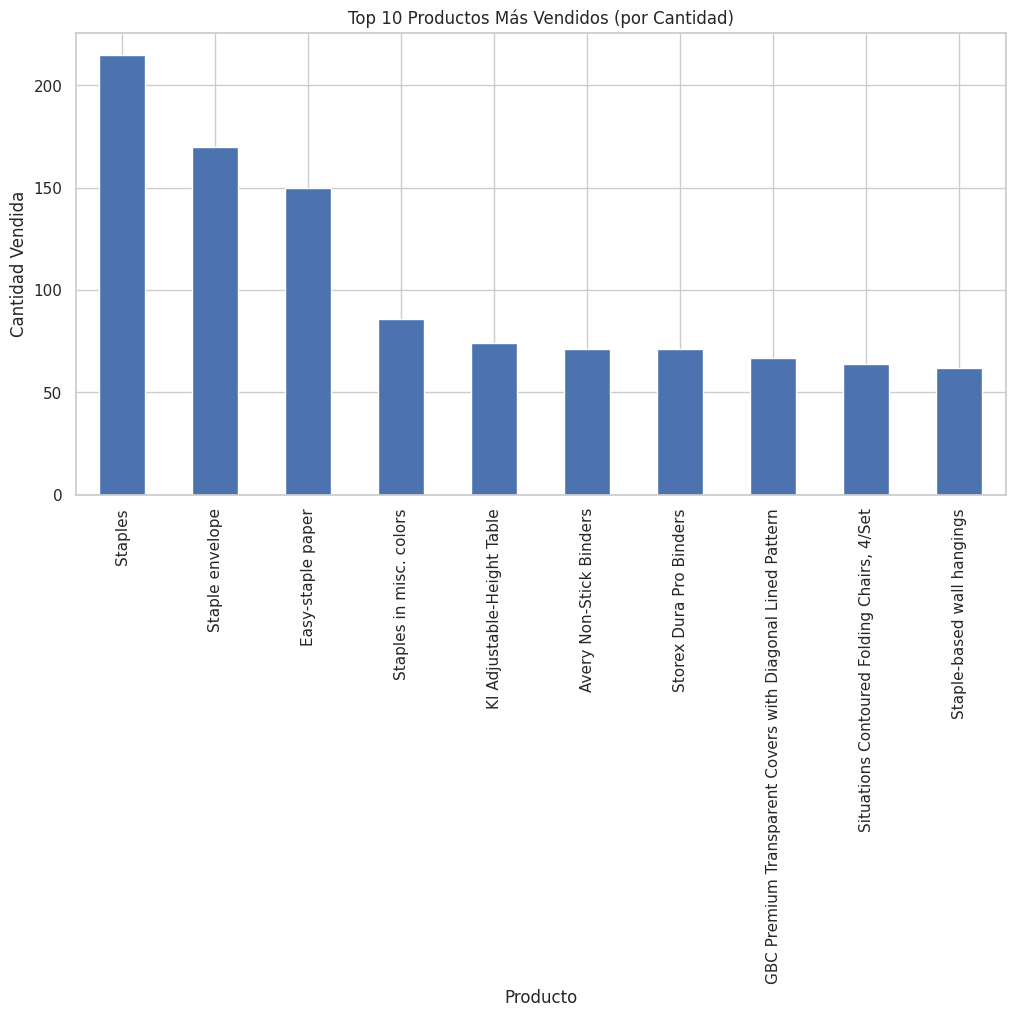

In [32]:
top_products = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Productos Más Vendidos (por Cantidad)')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.show()


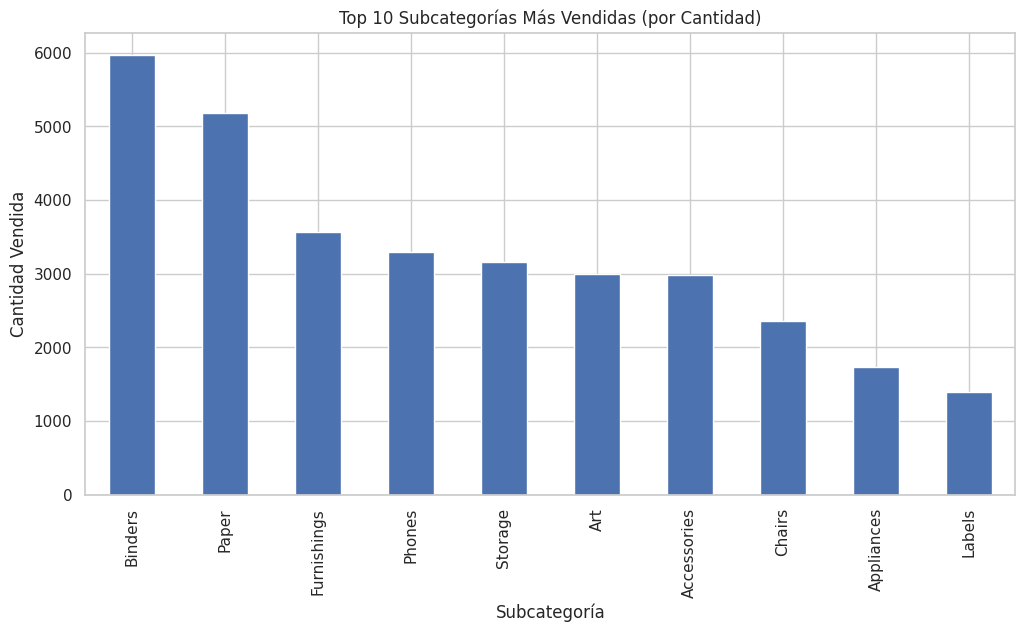

In [33]:
top_subcategories = df.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_subcategories.plot(kind='bar')
plt.title('Top 10 Subcategorías Más Vendidas (por Cantidad)')
plt.xlabel('Subcategoría')
plt.ylabel('Cantidad Vendida')
plt.show()


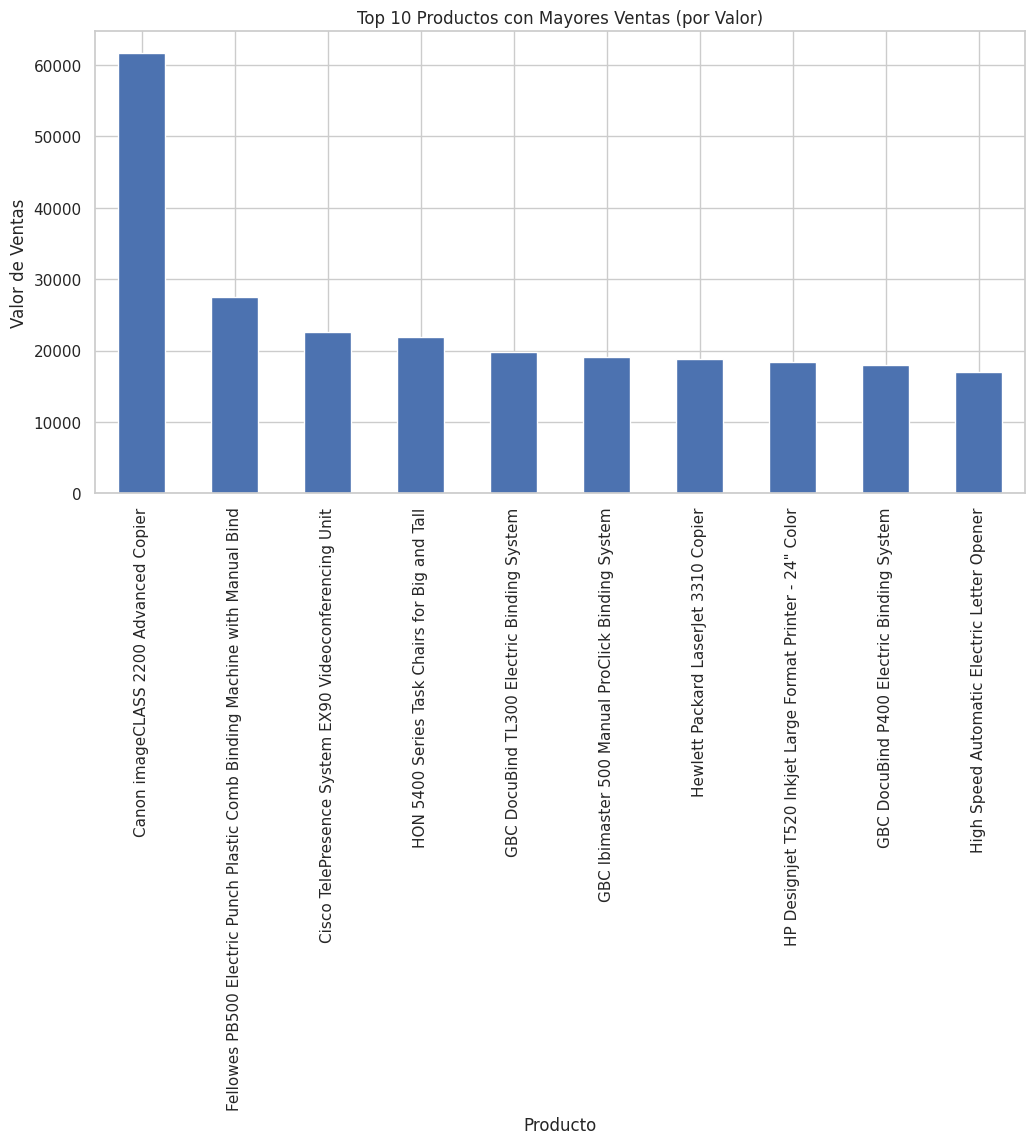

In [34]:
top_products_value = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_products_value.plot(kind='bar')
plt.title('Top 10 Productos con Mayores Ventas (por Valor)')
plt.xlabel('Producto')
plt.ylabel('Valor de Ventas')
plt.show()


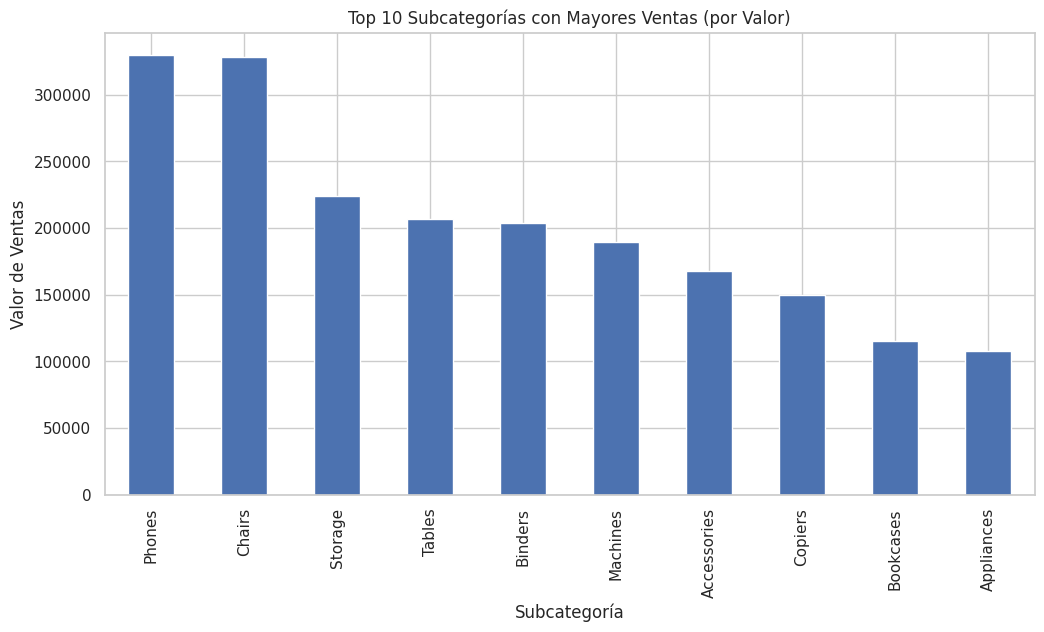

In [35]:
top_subcategories_value = df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_subcategories_value.plot(kind='bar')
plt.title('Top 10 Subcategorías con Mayores Ventas (por Valor)')
plt.xlabel('Subcategoría')
plt.ylabel('Valor de Ventas')
plt.show()
